In [ ]:
# Rayidi Abhiram
# 21BCE9261
# VITAP MORNING SLOT
# ASSIGNMENT-4
# Performing Multiple models (Logistic Regression, Decision Tree Regressor, Random Forest Regressor) on Employee Attrition Dataset

**Import neccessary libraries**

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import the dataset**

In [203]:
df = pd.read_csv("/content/drive/MyDrive/Colab Datasets/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [204]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [205]:
df.shape

(1470, 35)

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [207]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


**Handling null values**

In [208]:
df.isnull().any()
# No null values found

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [209]:
df.isnull().sum()
# Since the dataset does not contain any null values, we can proceed to next step.

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**Data Visualization**

In [210]:
df.corr()

<ipython-input-210-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


<ipython-input-211-1020bb8eeb59>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

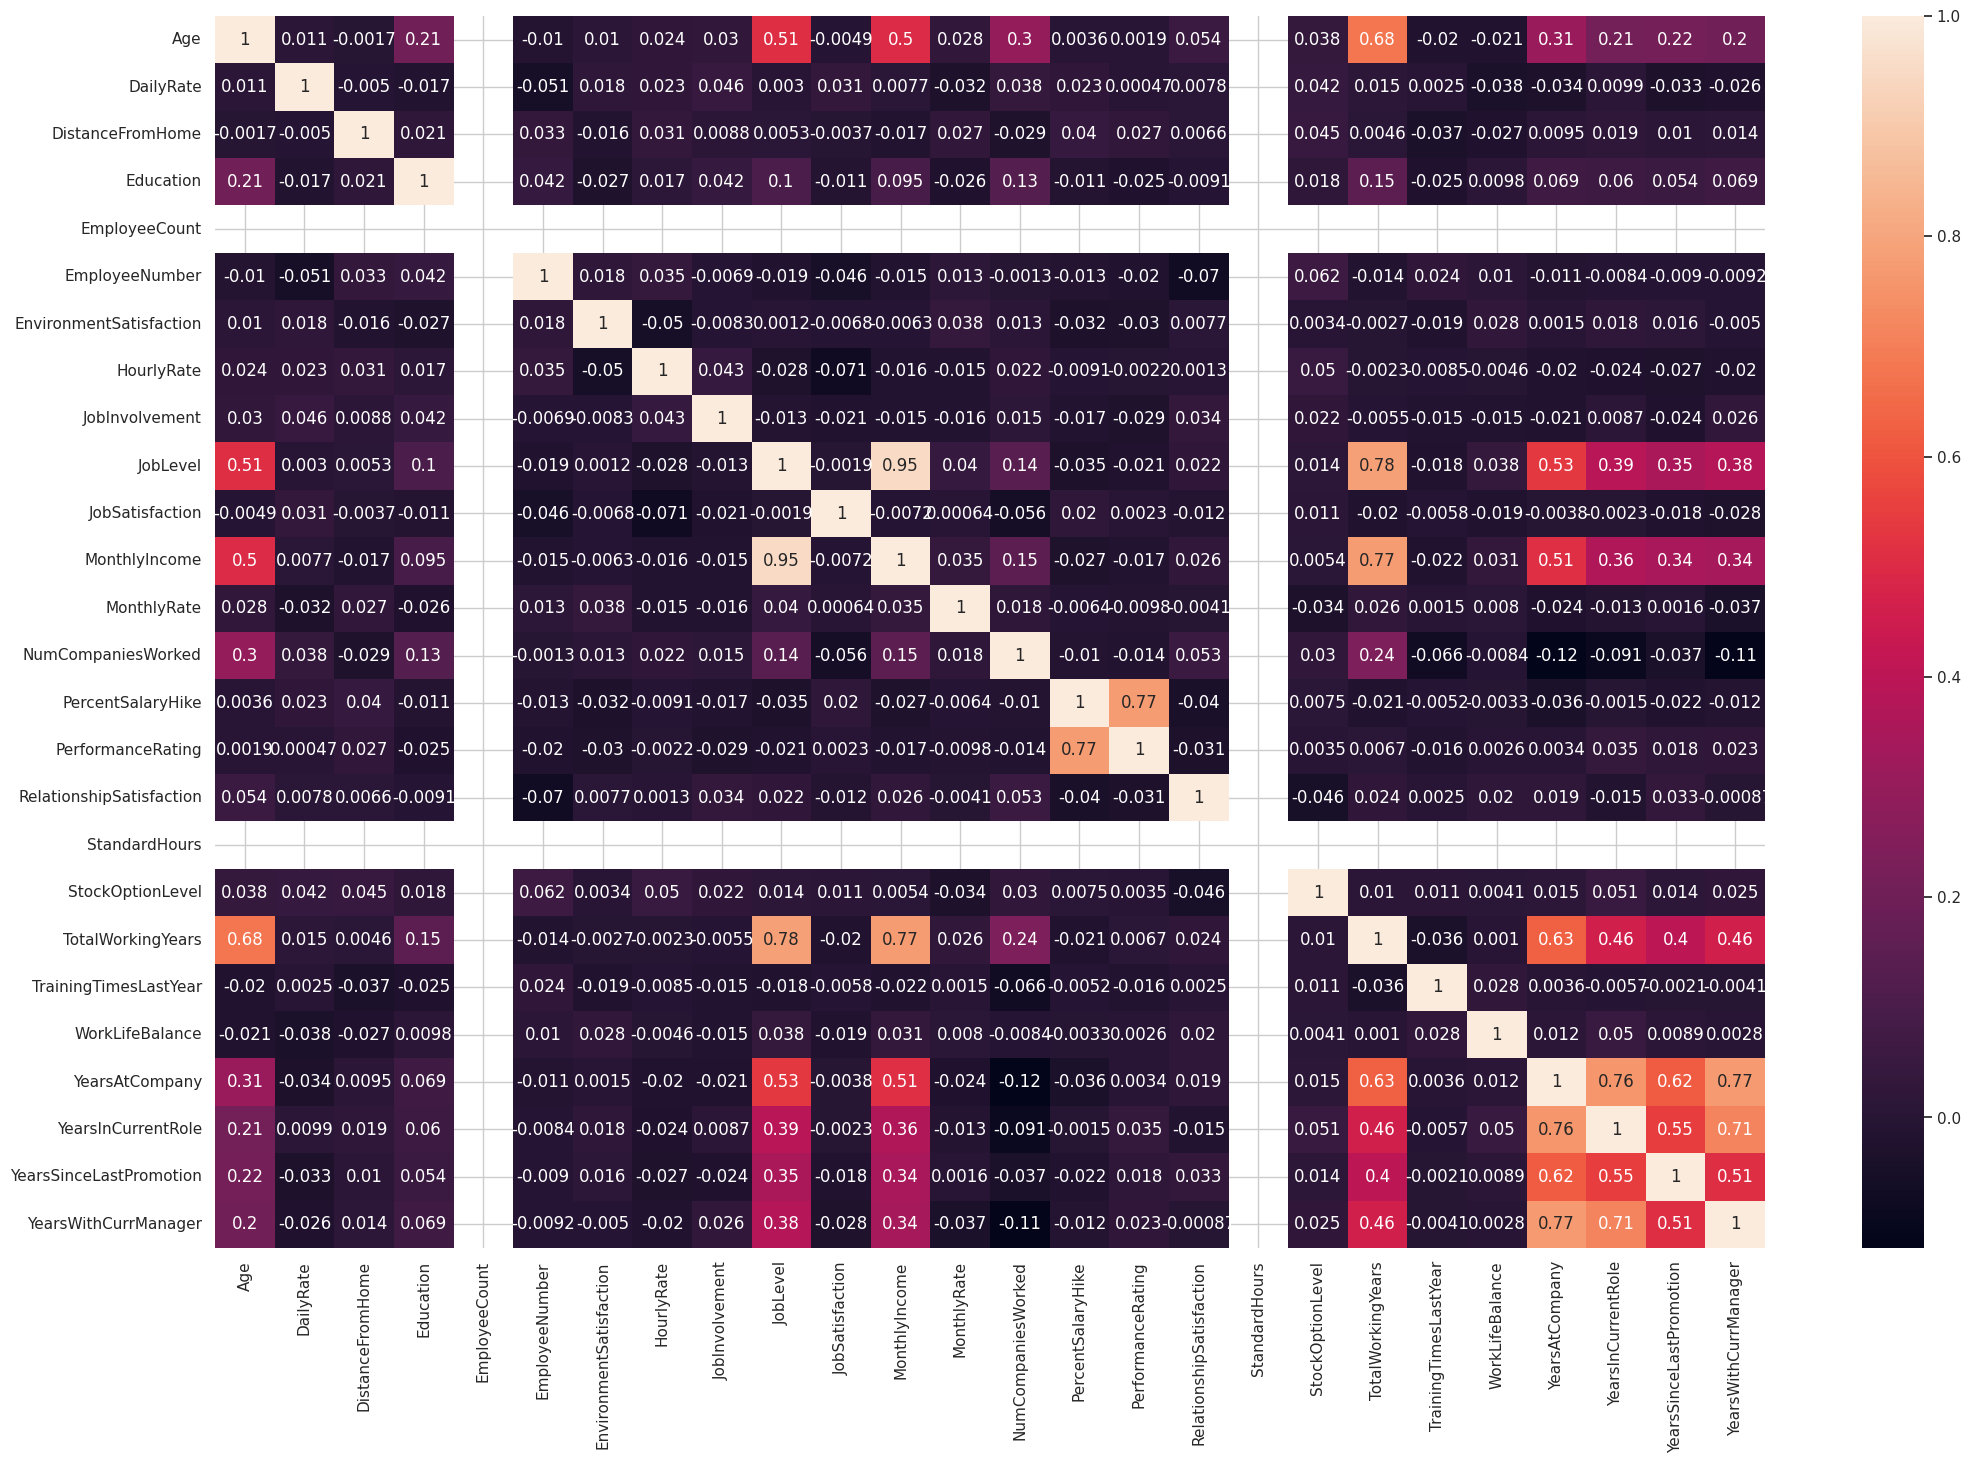

In [211]:
plt.figure(figsize=(25,16))
sns.heatmap(df.corr(),annot=True)

"\nInference :\n1) We can say that the emoployees who travel frequently are more likely to be \n   Attrited followed by travels rarely followed by non travel. \n   So people who not travel has less Attrtion.\n2) Similarly there isn't much linear trend regarding Department and Attrition.\n3) Intrestingly the count of Attrition is more in Research and Development \n   but the number changes when comes to percentage.\n4) Also the gender may not affect much Attrition.\n5) Research Director Designation has less Attrition which is leading to security\n   of role, Also we can find that more than 50% are Attrited in \n   Sales Representative Designation.\n6) Not so suprised by how the Bachelors has been most Attrited compared to\n   Married and Divorced.\n7) Not much progressed by the analytics of over18.\n8) Major point founded is that people who do overtime has more possibility of \n   Attrition.\n"

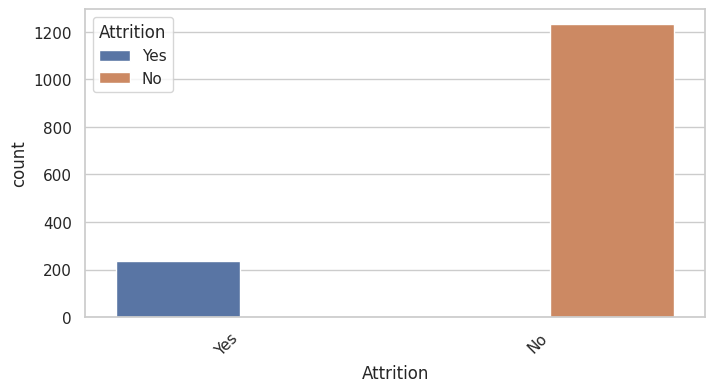

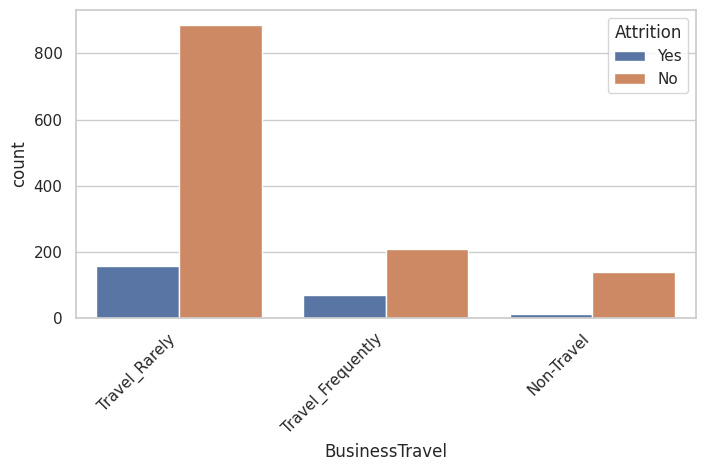

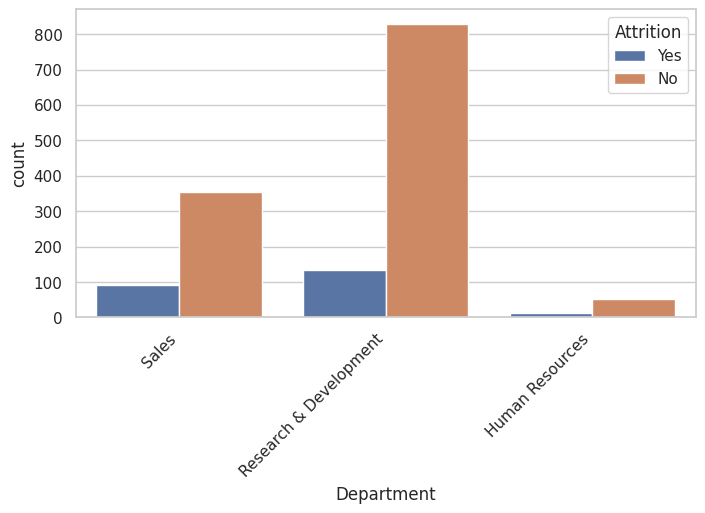

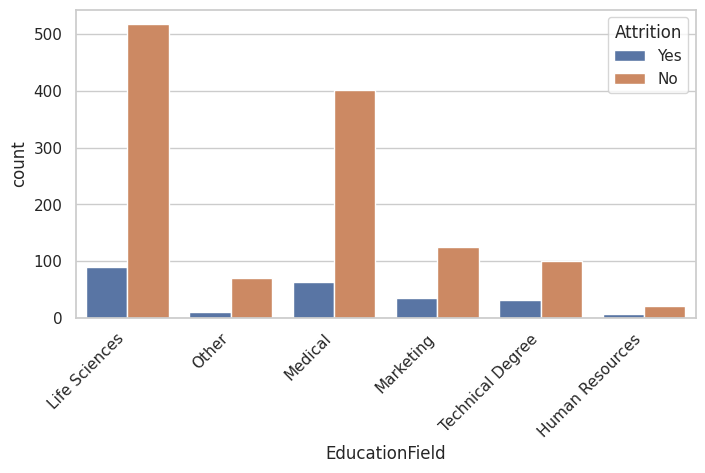

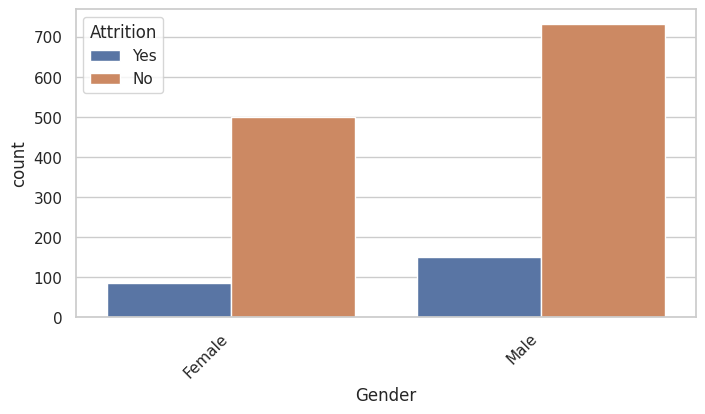

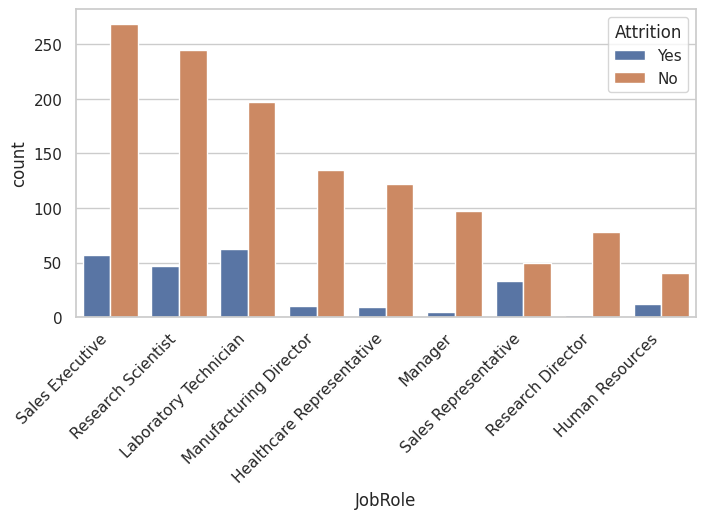

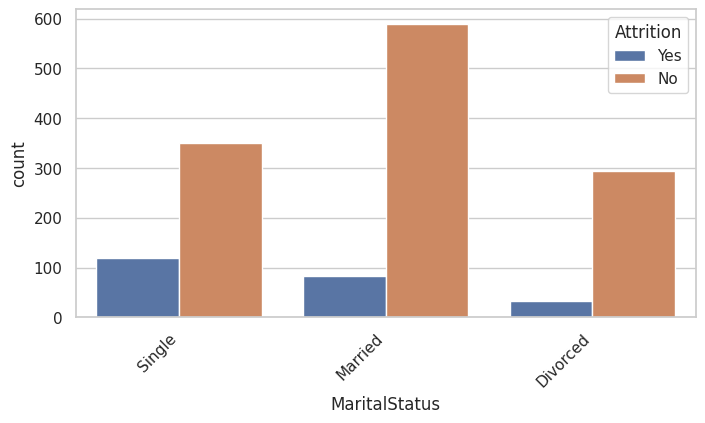

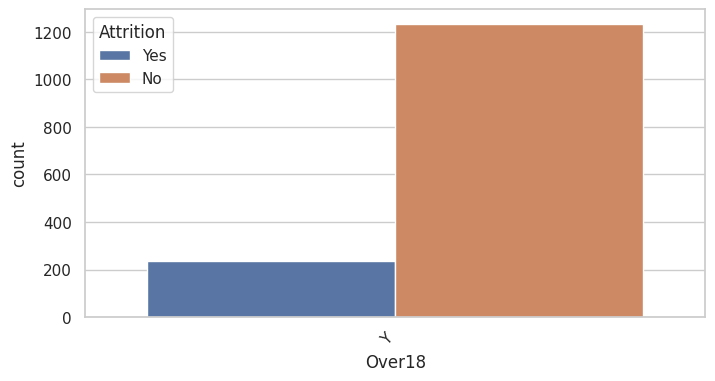

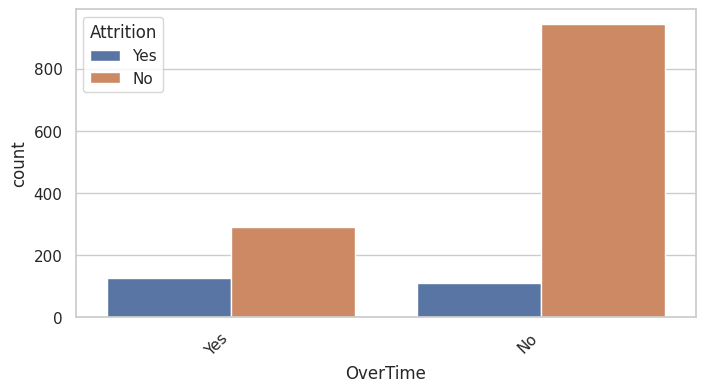

In [212]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.subplots(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue="Attrition")
    plt.xticks(rotation=45, ha='right')

"""
Inference :
1) We can say that the emoployees who travel frequently are more likely to be
   Attrited followed by travels rarely followed by non travel.
   So people who not travel has less Attrtion.
2) Similarly there isn't much linear trend regarding Department and Attrition.
3) Intrestingly the count of Attrition is more in Research and Development
   but the number changes when comes to percentage.
4) Also the gender may not affect much Attrition.
5) Research Director Designation has less Attrition which is leading to security
   of role, Also we can find that more than 50% are Attrited in
   Sales Representative Designation.
6) Not so suprised by how the Bachelors has been most Attrited compared to
   Married and Divorced.
7) Not much progressed by the analytics of over18.
8) Major point founded is that people who do overtime has more possibility of
   Attrition.
"""

<Axes: xlabel='Attrition', ylabel='Count'>

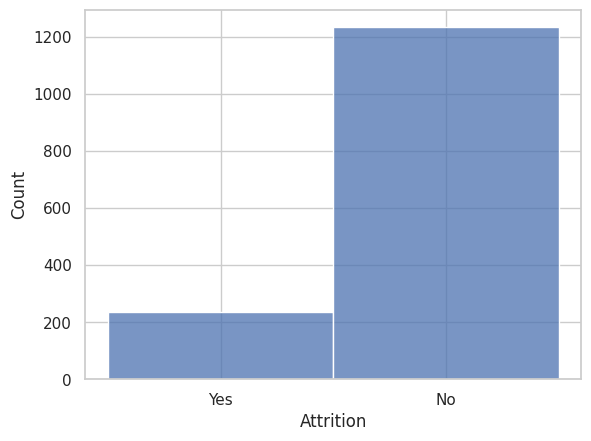

In [213]:
sns.histplot(df["Attrition"])

<Axes: >

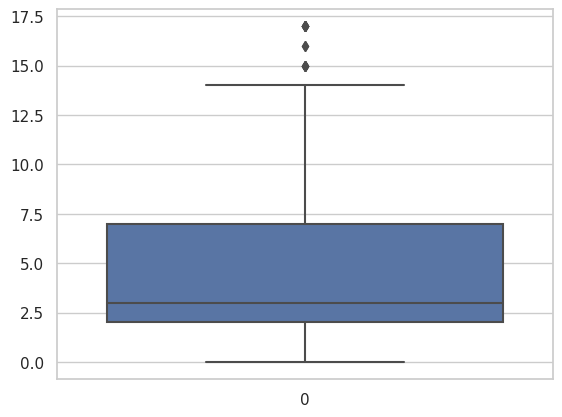

In [214]:
sns.boxplot(df.YearsWithCurrManager )

<Axes: >

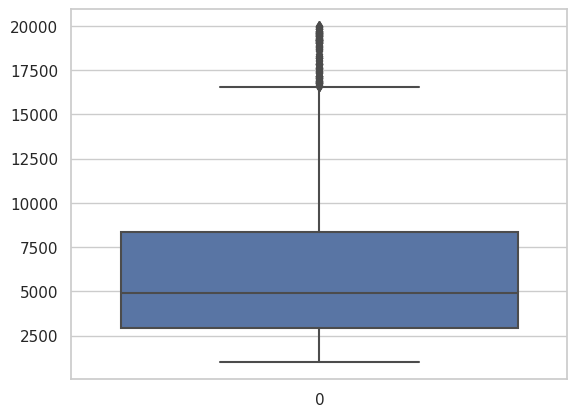

In [215]:
sns.boxplot(df.MonthlyIncome )

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

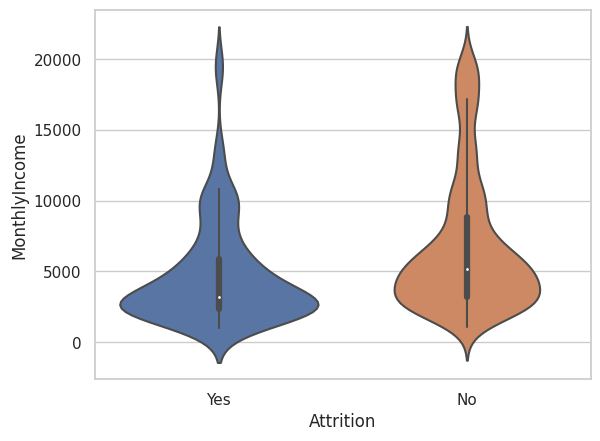

In [216]:
sns.violinplot(x= "Attrition", y= "MonthlyIncome", data=df)

**Splitting Dependent and Independent variables**

In [217]:
x = df.drop(columns=['Attrition', 'DailyRate', 'StockOptionLevel', 'StandardHours', 'Over18'])

In [218]:
y = df['Attrition']

In [219]:
x.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,Sales,1,2,Life Sciences,1,1,2,Female,...,11,3,1,8,0,1,6,4,0,5
1,49,Travel_Frequently,Research & Development,8,1,Life Sciences,1,2,3,Male,...,23,4,4,10,3,3,10,7,1,7
2,37,Travel_Rarely,Research & Development,2,2,Other,1,4,4,Male,...,15,3,2,7,3,3,0,0,0,0
3,33,Travel_Frequently,Research & Development,3,4,Life Sciences,1,5,4,Female,...,11,3,3,8,3,3,8,7,3,0
4,27,Travel_Rarely,Research & Development,2,1,Medical,1,7,1,Male,...,12,3,4,6,3,3,2,2,2,2


In [220]:
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

**Encoding**

In [221]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [222]:
x["Gender"] = le.fit_transform(x["Gender"])
x["BusinessTravel"] = le.fit_transform(x["BusinessTravel"])
x['Department'] = le.fit_transform(x['Department'])
x['EducationField'] = le.fit_transform(x['EducationField'])
x['JobRole'] = le.fit_transform(x['JobRole'])
x['MaritalStatus'] = le.fit_transform(x['MaritalStatus'])
x['OverTime'] = le.fit_transform(x['OverTime'])
y = le.fit_transform(y)

In [223]:
x.shape

(1470, 30)

**Feature Scaling**

In [224]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_scaled = pd.DataFrame(sc.fit_transform(x), columns = x.columns)


In [225]:
x_scaled

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.590048,1.401512,-1.010909,-0.891688,-0.937414,0.0,-1.701283,-0.660531,-1.224745,...,-1.150554,-0.426230,-1.584178,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-0.913194,-0.493817,-0.147150,-1.868426,-0.937414,0.0,-1.699621,0.254625,0.816497,...,2.129306,2.346151,1.191438,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,0.590048,-0.493817,-0.887515,-0.891688,1.316673,0.0,-1.696298,1.169781,0.816497,...,-0.057267,-0.426230,-0.658973,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,-0.913194,-0.493817,-0.764121,1.061787,-0.937414,0.0,-1.694636,1.169781,-1.224745,...,-1.150554,-0.426230,0.266233,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,0.590048,-0.493817,-0.887515,-1.868426,0.565311,0.0,-1.691313,-1.575686,0.816497,...,-0.877232,-0.426230,1.191438,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,-0.913194,-0.493817,1.703764,-0.891688,0.565311,0.0,1.721670,0.254625,0.816497,...,0.489376,-0.426230,0.266233,0.735447,0.155707,0.338096,-0.327893,-0.615492,-0.679146,-0.314873
1466,0.227347,0.590048,-0.493817,-0.393938,-1.868426,0.565311,0.0,1.723332,1.169781,0.816497,...,-0.057267,-0.426230,-1.584178,-0.293077,1.707500,0.338096,-0.001333,0.764998,-0.368715,0.806541
1467,-1.086676,0.590048,-0.493817,-0.640727,0.085049,-0.937414,0.0,1.726655,-0.660531,0.816497,...,1.309341,2.346151,-0.658973,-0.678774,-2.171982,0.338096,-0.164613,-0.615492,-0.679146,-0.314873
1468,1.322365,-0.913194,1.401512,-0.887515,0.085049,0.565311,0.0,1.728317,1.169781,0.816497,...,-0.330589,-0.426230,1.191438,0.735447,0.155707,-1.077862,0.325228,0.488900,-0.679146,1.086895


**Splitting Testing and Training data**

In [226]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x_scaled, y, test_size=0.2, random_state = 0)

In [227]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1176, 30), (294, 30), (1176,), (294,))

**Model Building**

**Logistic Regression**

In [228]:
from sklearn.linear_model import LogisticRegression
lo = LogisticRegression()

In [229]:
lo.fit(x_train, y_train)

LogisticRegression()

In [230]:
y_pred= lo.predict(x_test)

**Evaluation Metrics**

In [231]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
accuracy_score(y_test, y_pred)

0.8843537414965986

In [232]:
confusion_matrix(y_test,y_pred)

array([[240,   5],
       [ 29,  20]])

In [233]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       245
           1       0.80      0.41      0.54        49

    accuracy                           0.88       294
   macro avg       0.85      0.69      0.74       294
weighted avg       0.88      0.88      0.87       294



In [234]:
# ROC-AUC Curve
probability = lo.predict_proba(x_test)[:,1]

In [235]:
fpr, tpr, thresholds = roc_curve(y_test, probability)

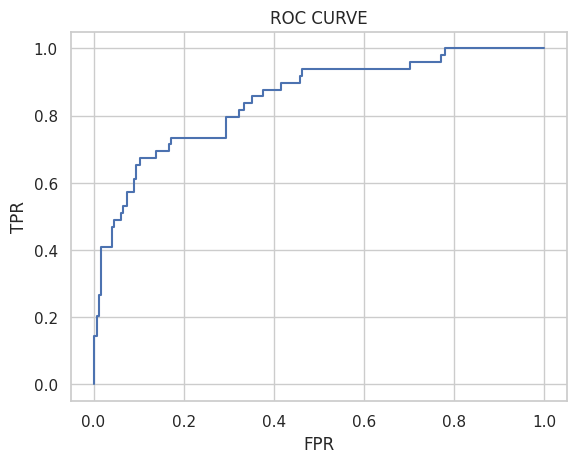

In [236]:
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

**Decision Tree Regressor**

In [237]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

In [238]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [239]:
dt_pred = dt_model.predict(x_test)

**Evaluation Metrics**

In [240]:
accuracy_score(y_test, dt_pred)

0.7312925170068028

In [241]:
confusion_matrix(y_test, dt_pred)

array([[201,  44],
       [ 35,  14]])

In [242]:
pd.crosstab(y_test, dt_pred)

col_0,0,1
row_0,,
0,201,44
1,35,14


In [243]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       245
           1       0.80      0.41      0.54        49

    accuracy                           0.88       294
   macro avg       0.85      0.69      0.74       294
weighted avg       0.88      0.88      0.87       294



In [244]:
probability = dt_model.predict_proba(x_test)[:,1]

In [245]:
# ROC CURVE
fpr, tpr, thresholds = roc_curve(y_test, probability)

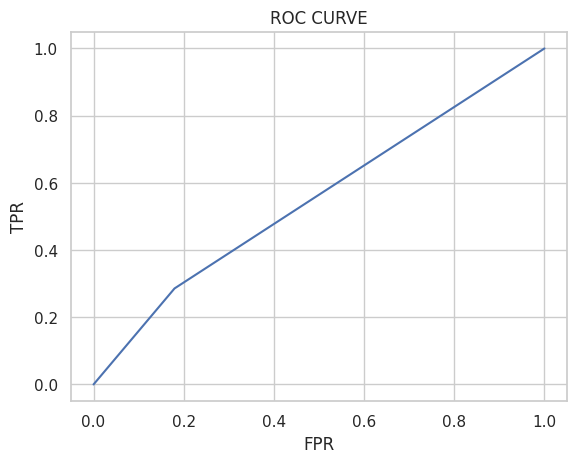

In [246]:
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

**Parameter Tuning**

[Text(0.322849025974026, 0.9722222222222222, 'x[23] <= -1.257\ngini = 0.269\nsamples = 1176\nvalue = [988, 188]'),
 Text(0.07142857142857142, 0.9166666666666666, 'x[15] <= 0.552\ngini = 0.5\nsamples = 78\nvalue = [39, 39]'),
 Text(0.04220779220779221, 0.8611111111111112, 'x[3] <= 0.902\ngini = 0.426\nsamples = 39\nvalue = [27, 12]'),
 Text(0.025974025974025976, 0.8055555555555556, 'x[14] <= -1.114\ngini = 0.312\nsamples = 31\nvalue = [25, 6]'),
 Text(0.012987012987012988, 0.75, 'x[16] <= -0.937\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.006493506493506494, 0.6944444444444444, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.01948051948051948, 0.6944444444444444, 'x[17] <= -0.838\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.012987012987012988, 0.6388888888888888, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.025974025974025976, 0.6388888888888888, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.03896103896103896, 0.75, 'x[18] <= -0.878\ngini = 0.153\nsamp

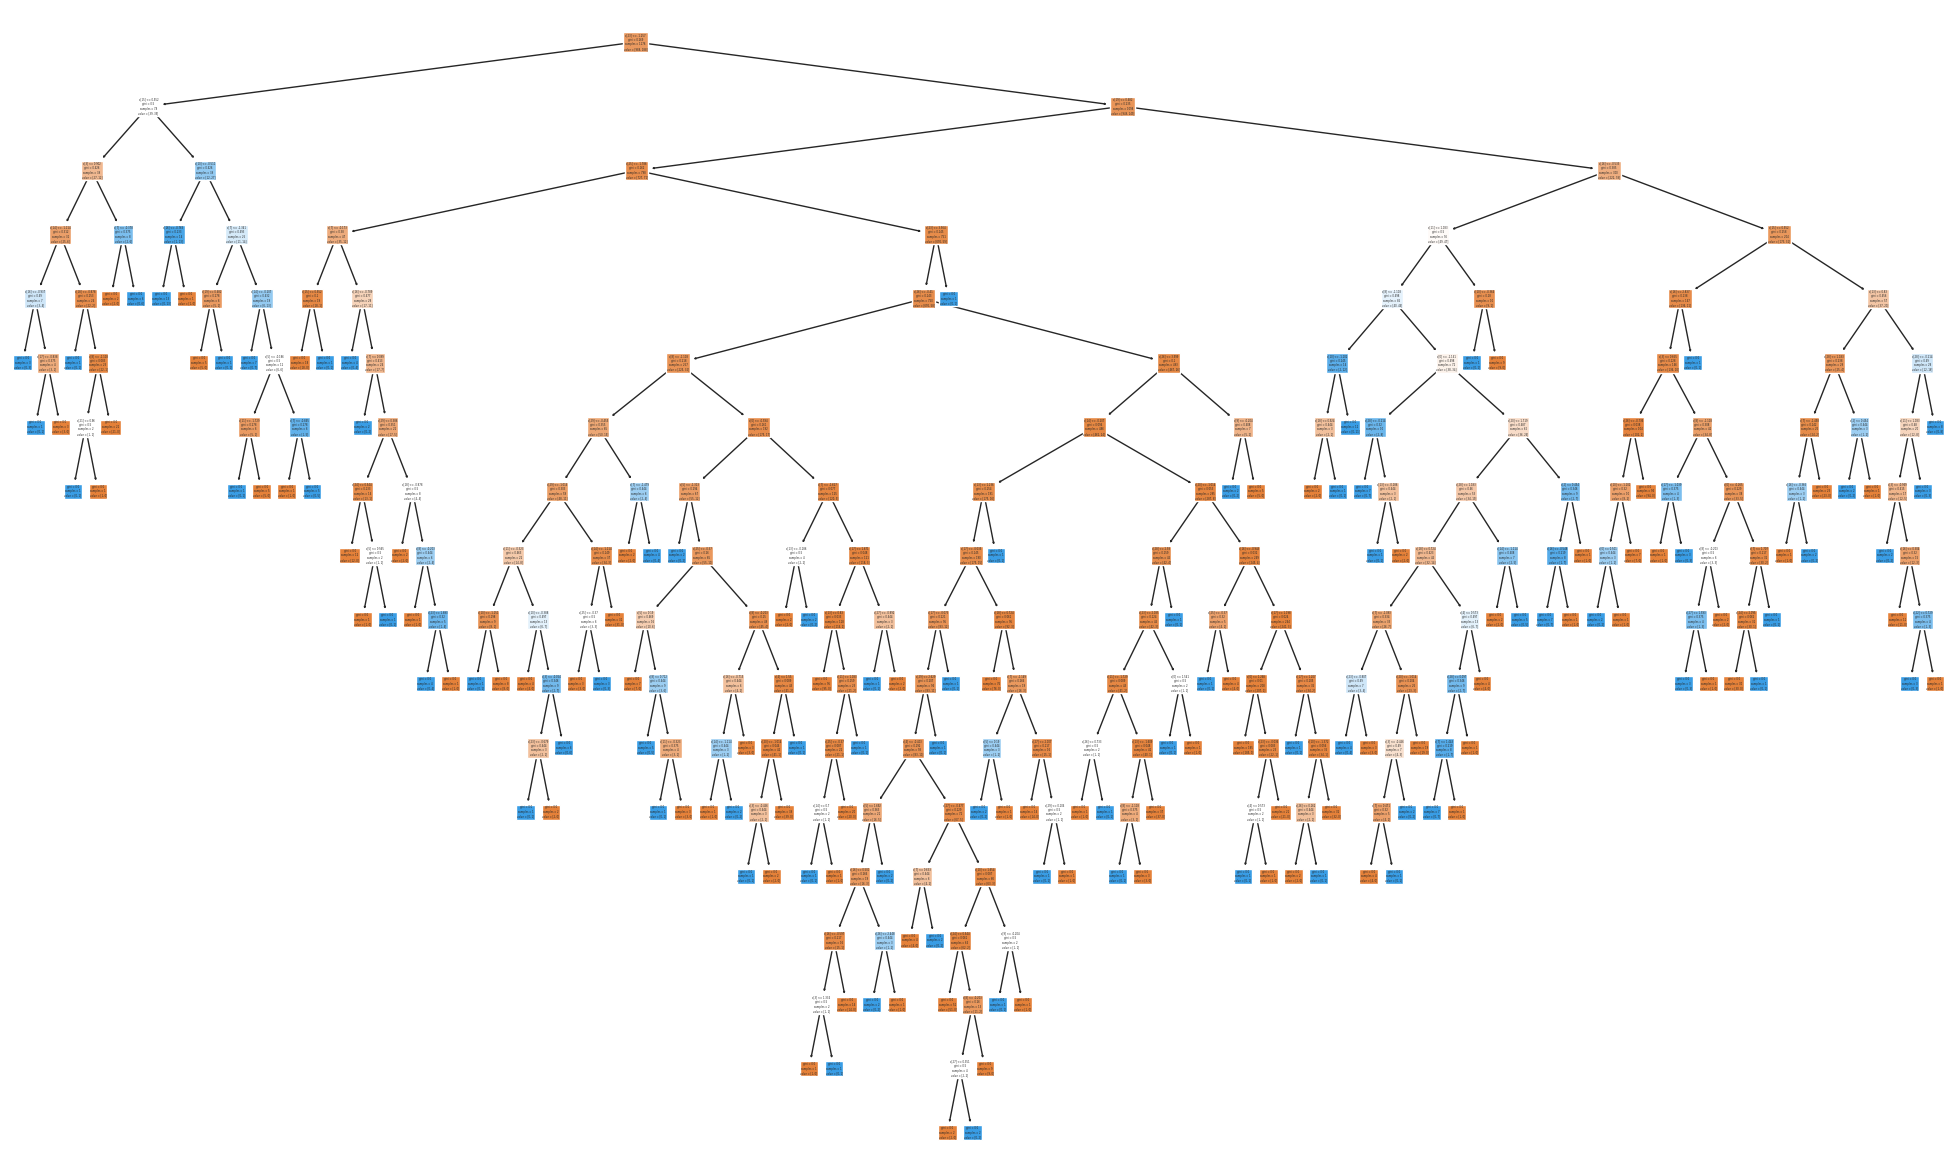

In [247]:
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(dt_model, filled=True)

In [248]:
# Prepruning
from sklearn.model_selection import GridSearchCV
parameter={
 'criterion':['gini','entropy'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']

}

In [249]:
dtc_cv=GridSearchCV(estimator=dt_model,param_grid=parameter,cv=5,scoring="accuracy")

In [250]:
dtc_cv.fit(x_train,y_train) # fitting the data

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [251]:
dtc_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'auto',
 'splitter': 'best'}

In [252]:
pred=dtc_cv.predict(x_test)

In [253]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       245
           1       0.00      0.00      0.00        49

    accuracy                           0.83       294
   macro avg       0.42      0.50      0.45       294
weighted avg       0.69      0.83      0.76       294



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [254]:
accuracy_score(y_test,pred)

0.8333333333333334

In [255]:
probability = dt_model.predict_proba(x_test)[:,1]

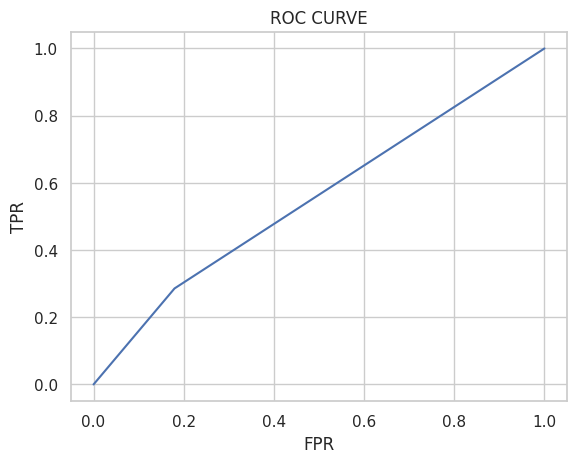

In [256]:
fpr, tpr, thresholds = roc_curve(y_test, probability)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

**Random Forest Regressor**

In [257]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [258]:
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

In [259]:
rfc_cv= GridSearchCV(rfc,param_grid=forest_params,cv=10,scoring="accuracy")

In [260]:
rfc_cv.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')

In [261]:
pred_rf=rfc_cv.predict(x_test)

**Evaluation Metrics**

In [262]:
accuracy_score(y_test,pred_rf)

0.8469387755102041

In [263]:
confusion_matrix(y_test,pred_rf)

array([[240,   5],
       [ 40,   9]])

In [264]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91       245
           1       0.64      0.18      0.29        49

    accuracy                           0.85       294
   macro avg       0.75      0.58      0.60       294
weighted avg       0.82      0.85      0.81       294



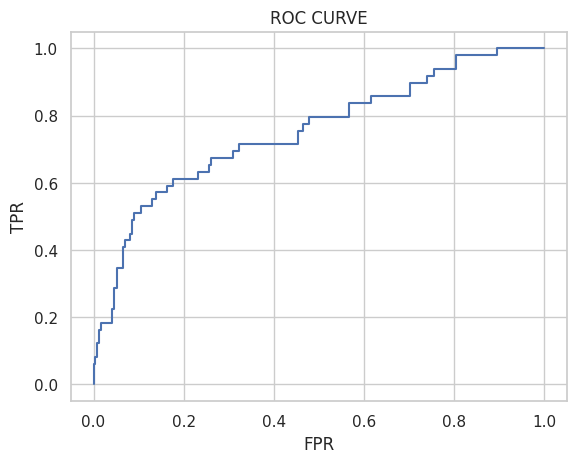

In [266]:
probability = rfc_cv.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probability)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

In [267]:
''' THE END '''

' THE END '

In [268]:
''' Thank You '''
# Rayidi Abhiram
# 21bce9261

' Thank You '